In [78]:
#
#!pip install pandas

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
pd.set_option('display.max_columns', 500)

dataset = pd.read_csv("Churn_Modelling.csv")

dataset.head(30)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [36]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [37]:
len(dataset.columns)

# Excited is our target variable

14

In [79]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [38]:
X = dataset.iloc[: , 3:13 ].values

y = dataset.iloc[: , 13].values

In [39]:
X.shape

(10000, 10)

In [40]:
y.shape

(10000,)

In [41]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [42]:
# !pip install sklearn

In [43]:
# Data preprocessing

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()

X[:,1] = labelencoder_X_1.fit_transform(X[:, 1])


labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])


In [44]:
X[:, 2]

array([0, 0, 0, ..., 0, 1, 0], dtype=object)

In [45]:
X[:, 1]

array([0, 2, 0, ..., 0, 1, 0], dtype=object)

In [47]:
# But countries name cannot be represent as 0,1,2,...,9 etc

# So Let do OneHotEncoding

onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [1.0000000e+00, 0.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [49]:
# That is great! But before doing further it is important that we do Normalizing data

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [50]:
X_train

array([[-0.57735027, -0.57735027,  1.07826139, ...,  0.64434291,
        -1.03875025,  0.4517245 ],
       [-0.57735027, -0.57735027, -0.60975259, ..., -1.55196866,
         0.96269532, -0.88917426],
       [-0.57735027,  1.73205081,  0.76947834, ..., -1.55196866,
        -1.03875025, -0.9441176 ],
       ...,
       [-0.57735027, -0.57735027,  0.24454717, ...,  0.64434291,
         0.96269532, -1.14637139],
       [ 1.73205081, -0.57735027,  0.39893869, ...,  0.64434291,
         0.96269532, -1.5245322 ],
       [-0.57735027, -0.57735027,  2.04578159, ..., -1.55196866,
        -1.03875025,  0.45877699]])

In [51]:
# Let build Model


from keras.models import Sequential
from keras.layers import Dense

In [56]:
#Initializing Neural Network
classifier = Sequential()

In [ ]:
# adding input layer 
classifier.add(Dense(output_dim=6, init='uniform', activation='relu', input_dim=11))

In [ ]:
# hidden layer
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))

In [ ]:
# output layer
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

In [62]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

d:\anacondainstall\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
8000/8000 [==============================] - 1s 172us/step - loss: 0.4772 - acc: 0.7956
Epoch 2/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.4273 - acc: 0.7957
Epoch 3/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.4207 - acc: 0.8119
Epoch 4/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4179 - acc: 0.8251
Epoch 5/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4156 - acc: 0.8270
Epoch 6/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.4143 - acc: 0.8270
Epoch 7/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.4124 - acc: 0.8290
Epoch 8/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.4118 - acc: 0.8326
Epoch 9/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4106 - acc: 0.8321
Epoch 10/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4097 - acc: 0.8312

8000/8000 [==============================] - 1s 117us/step - loss: 0.4013 - acc: 0.8354
Epoch 83/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.4006 - acc: 0.8315
Epoch 84/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.4005 - acc: 0.8354
Epoch 85/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.4013 - acc: 0.8331
Epoch 86/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4011 - acc: 0.8337
Epoch 87/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4008 - acc: 0.8347
Epoch 88/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.4007 - acc: 0.8340
Epoch 89/100
8000/8000 [==============================] - 1s 152us/step - loss: 0.4005 - acc: 0.8344
Epoch 90/100
8000/8000 [==============================] - 1s 114us/step - loss: 0.4006 - acc: 0.8341
Epoch 91/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4009 - acc: 0.8367
Epo

In [64]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [67]:
#!pip install seaborn

In [68]:
cm

array([[1556,   41],
       [ 270,  133]], dtype=int64)

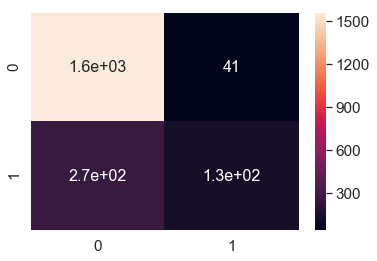

In [75]:
import seaborn as sn
sn.set(font_scale=1.4)#for label size

sn.heatmap(cm, annot=True,annot_kws={"size": 16})

In [77]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8445